In [1]:
from __future__ import division
from gaussian_filter import gaussian
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt

In [2]:
def gradient(img):
    # 左Sobel
    sobelL = np.array(
        [[1, 0, -1],
         [2, 0, -2],
         [1, 0, -1]])

    # 上sobel
    sobelT = np.array(
        [[ 1,  2,  1],
         [ 0,  0,  0],
         [-1, -2, -1]])

    sobelM = np.array(
        [[ 0,  1,  2],
         [-1,  0,  1],
         [-2, -1,  0]])

    sobelP = np.array(
        [[0, -1, -2],
         [1,  0, -1],
         [2,  1,  0]])

    # 卷积
    Gx = cv2.filter2D(img, -1, sobelM)
    Gy = cv2.filter2D(img, -1, sobelP)
    # 求梯度值，hypot给定两条直角边，返回斜边长
    # 等价于sqrt(x1**2 + x2**2)，以元素为单位运算
    G = np.hypot(Gx, Gy)
    # 梯度方向
    theta = np.arctan2(Gy, Gx) * 180 / np.pi   # 转弧度制

    return G.astype(int), theta

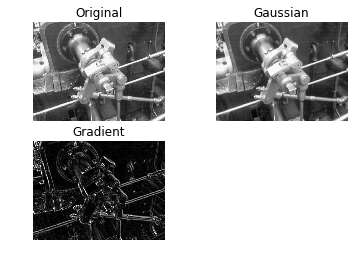

In [3]:
if __name__ == '__main__':
    img_path = './valve.png'
    img = np.array(Image.open(img_path))
    img = img[:, :, 0]
    blurred_img = gaussian(img)
    gri_img, gri_phase = gradient(blurred_img)

    plt.gray()

    plt.subplot(2, 2, 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title('Original')

    plt.subplot(2, 2, 2)
    plt.imshow(blurred_img)
    plt.axis('off')
    plt.title('Gaussian')

    plt.subplot(2, 2, 3)
    plt.imshow(gri_img)
    plt.axis('off')
    plt.title('Gradient')

    plt.show()